In [1]:
import os
from PIL import Image
import requests
from matplotlib import pyplot as plt

from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")

generations_dir = 'lichen_beard'

actual_picture = Image.open('generations/beard_pic.jpeg')


images = []
for image in os.listdir('generations/' + generations_dir + '/'):
    images.append(Image.open('generations/' + generations_dir + f'/{image}'))


inputs = processor(text=["a photo of a person with a beard of coral"], images=images, return_tensors="pt", padding=True)
for i in inputs:
    inputs[i] = inputs[i].to('cuda')
model = model.to('cuda')

outputs = model(**inputs)


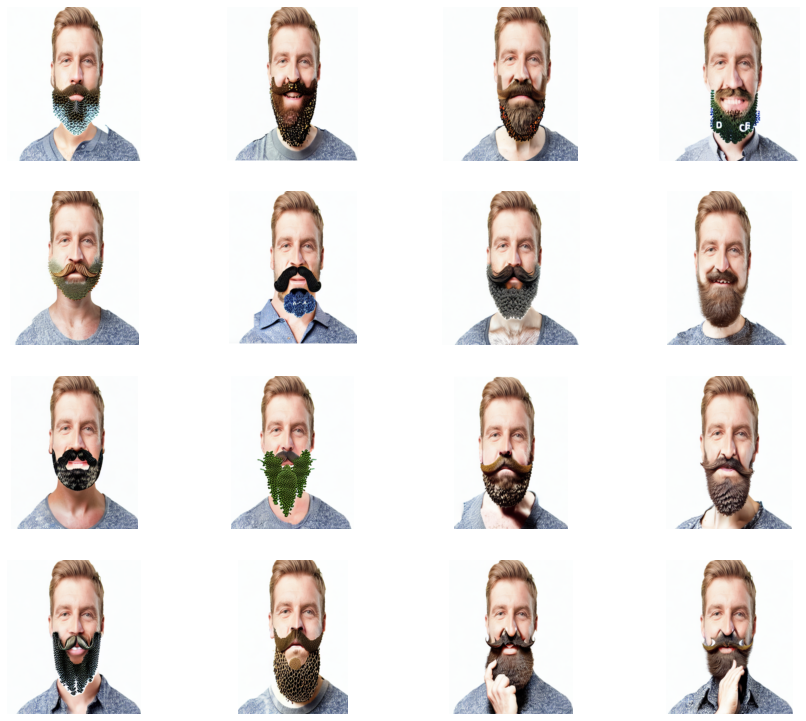

In [2]:
fig_width = 15
fig_height = 13

logits_per_image = outputs.logits_per_image
sorted_images = [image for _, image in sorted(zip(logits_per_image, images), reverse=True)]

# Calculate the number of rows and columns for the grid
num_images = len(sorted_images)
num_rows = int(num_images ** 0.5)
num_cols = (num_images + num_rows - 1) // num_rows

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Loop through the images and plot them in the subplots
for i, ax in enumerate(axes.flat):
    if i < num_images:
        ax.imshow(sorted_images[i])
    ax.axis('off')

# Display the grid of subplots
plt.show()

In [3]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

images_comparison = []
start_dir = 'lichen/beard_pics/'
for image in os.listdir(f'{start_dir}'):
    images_comparison.append(Image.open(f'{start_dir}{image}'))
    
inputs = processor(text=["a photo"], images=images, return_tensors="pt", padding=True)
for i in inputs:
    inputs[i] = inputs[i].to('cuda')
    
output_comparison_photos = model(**inputs)

image_embeddings = outputs.image_embeds.detach().cpu().numpy()
comparison_embeddings = output_comparison_photos.image_embeds.detach().cpu().numpy()

similarity = []

for i in range(len(comparison_embeddings)):
    similarities = cosine_similarity(comparison_embeddings[i].reshape(1, -1), image_embeddings)
    similarity.append(similarities.flatten().tolist())
similarity1 = np.mean(similarity, axis=0)


In [4]:
similarity1

array([0.87888512, 0.87629854, 0.9047953 , 0.90127866, 0.87802462,
       0.91234234, 0.91641939, 0.90196041, 0.91471349, 0.90726986,
       0.87798046, 0.83191613, 0.91333158, 0.86141839, 0.91037042,
       0.90803387])

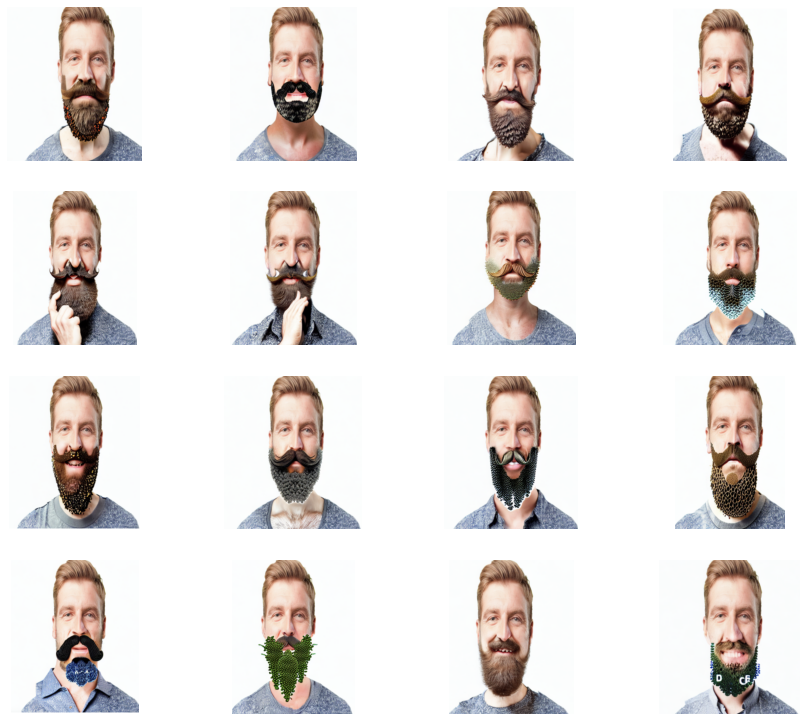

In [5]:
sorted_images = [image for _, image in sorted(zip(similarity1, images), reverse=True)]

# Calculate the number of rows and columns for the grid
num_images = len(sorted_images)
num_rows = int(num_images ** 0.5)
num_cols = (num_images + num_rows - 1) // num_rows

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Loop through the images and plot them in the subplots
for i, ax in enumerate(axes.flat):
    if i < num_images:
        ax.imshow(sorted_images[i])
    ax.axis('off')

# Display the grid of subplots
plt.show()

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

images_comparison = []
start_dir = 'lichen/solo_pics/'
for image in os.listdir(f'{start_dir}'):
    images_comparison.append(Image.open(f'{start_dir}{image}'))
    
inputs = processor(text=["a photo"], images=images, return_tensors="pt", padding=True)
for i in inputs:
    inputs[i] = inputs[i].to('cuda')
    
output_comparison_photos = model(**inputs)

image_embeddings = outputs.image_embeds.detach().cpu().numpy()
comparison_embeddings = output_comparison_photos.image_embeds.detach().cpu().numpy()

similarity = []

for i in range(len(comparison_embeddings)):
    similarities = cosine_similarity(comparison_embeddings[i].reshape(1, -1), image_embeddings)
    similarity.append(similarities.flatten().tolist())
similarity2 = np.mean(similarity, axis=0)

In [7]:
similarity2

array([0.87888512, 0.87629854, 0.9047953 , 0.90127866, 0.87802462,
       0.91234234, 0.91641939, 0.90196041, 0.91471349, 0.90726986,
       0.87798046, 0.83191613, 0.91333158, 0.86141839, 0.91037042,
       0.90803387])

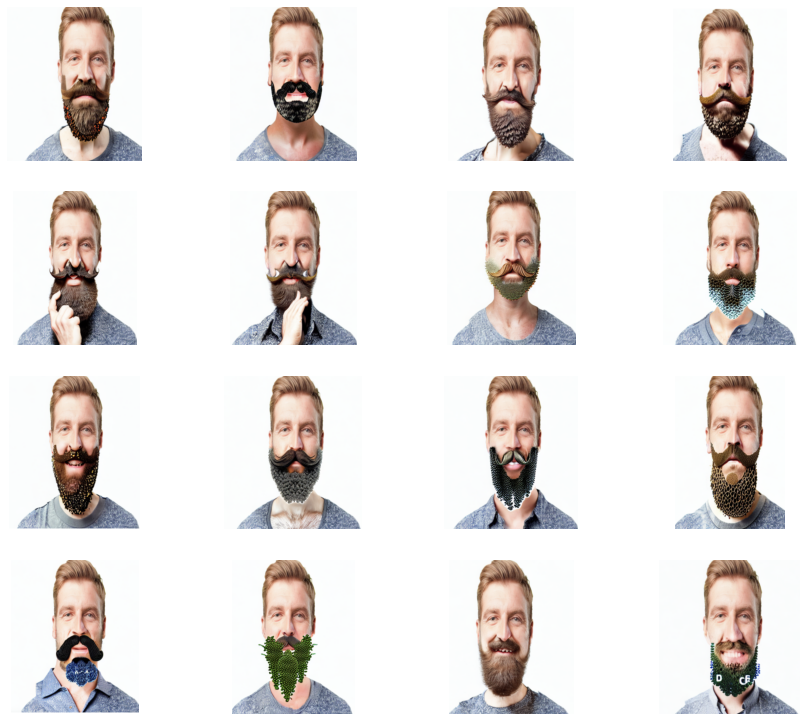

In [8]:
sorted_images = [image for _, image in sorted(zip(similarity2, images), reverse=True)]

# Calculate the number of rows and columns for the grid
num_images = len(sorted_images)
num_rows = int(num_images ** 0.5)
num_cols = (num_images + num_rows - 1) // num_rows

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Loop through the images and plot them in the subplots
for i, ax in enumerate(axes.flat):
    if i < num_images:
        ax.imshow(sorted_images[i])
        # print the similarity score as the title
    ax.axis('off')

# Display the grid of subplots
plt.show()

In [9]:
inputs = processor(text=["a photo of a person with a beard of barnacles"], images=[actual_picture], return_tensors="pt", padding=True)
for i in inputs:
    inputs[i] = inputs[i].to('cuda')
model = model.to('cuda')
output_comparison_photos = model(**inputs)

image_embeddings = outputs.image_embeds.detach().cpu().numpy()
comparison_embeddings = output_comparison_photos.image_embeds.detach().cpu().numpy()

similarity = []

for i in range(len(comparison_embeddings)):
    similarities = cosine_similarity(comparison_embeddings[i].reshape(1, -1), image_embeddings)
    similarity.append(similarities.flatten().tolist())
similarity3 = np.mean(similarity, axis=0)

In [10]:
similarity3

array([0.72818005, 0.72413701, 0.75852281, 0.78909451, 0.71115547,
       0.84168833, 0.80118126, 0.7739718 , 0.79942876, 0.76794338,
       0.7590968 , 0.72119373, 0.84670544, 0.90384877, 0.83916938,
       0.8217051 ])

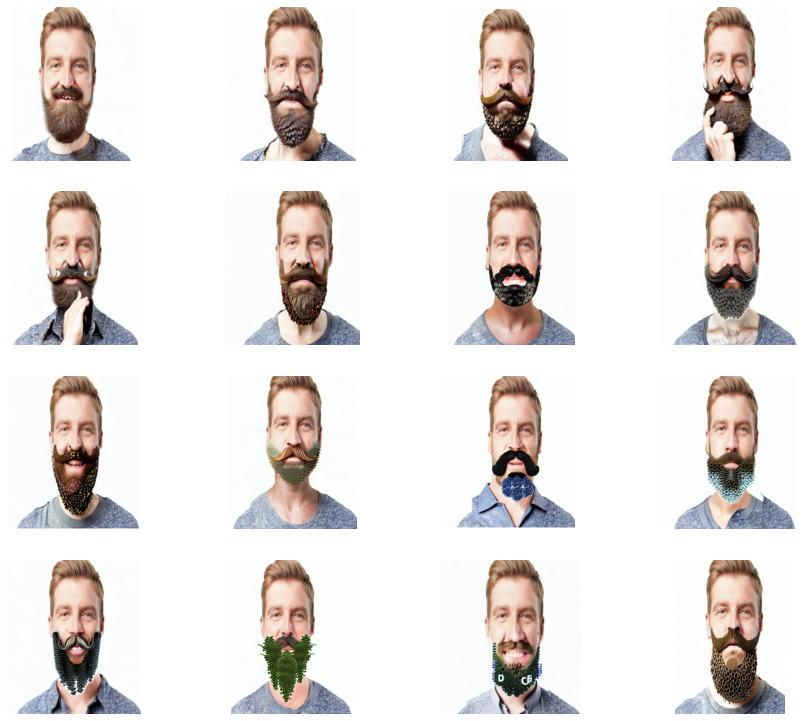

In [11]:
sorted_images = [image for _, image in sorted(zip(similarity3, images), reverse=True)]

# Calculate the number of rows and columns for the grid
num_images = len(sorted_images)
num_rows = int(num_images ** 0.5)
num_cols = (num_images + num_rows - 1) // num_rows

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Loop through the images and plot them in the subplots
for i, ax in enumerate(axes.flat):
    if i < num_images:
        ax.imshow(sorted_images[i])
    ax.axis('off')

# Display the grid of subplots
plt.show()

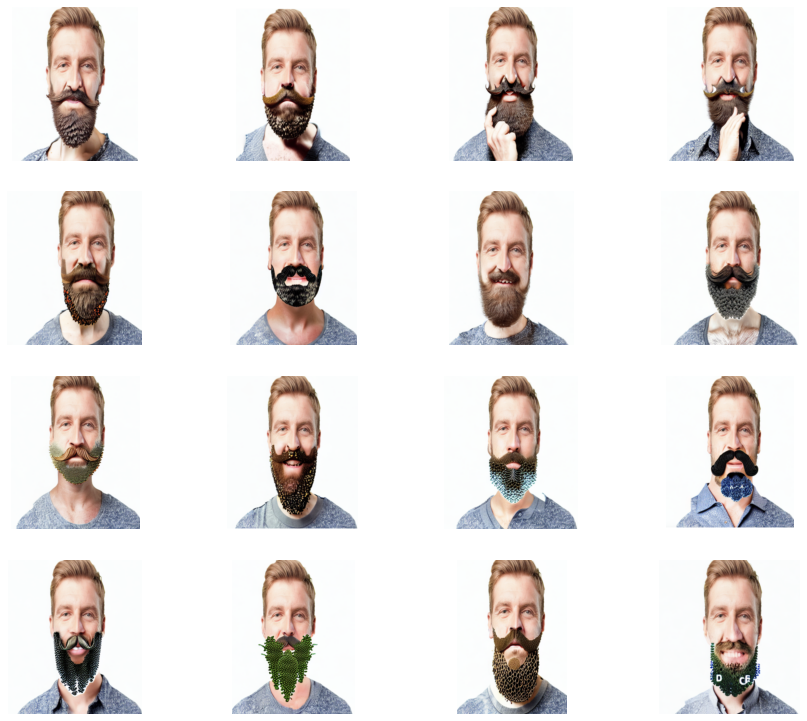

In [12]:
similarity4 = similarity1 + similarity2 + similarity3
sorted_images = [image for _, image in sorted(zip(similarity4, images), reverse=True)]

# Calculate the number of rows and columns for the grid
num_images = len(sorted_images)
num_rows = int(num_images ** 0.5)
num_cols = (num_images + num_rows - 1) // num_rows


# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Loop through the images and plot them in the subplots
for i, ax in enumerate(axes.flat):
    if i < num_images:
        ax.imshow(sorted_images[i])
    ax.axis('off')

# Display the grid of subplots
plt.show()

In [ ]:
from typing import List
def tile_image(images: List[str]):
    from PIL import Image

    # Open the three input images
    
    size = (256, 256)
    images = [Image.open(image).resize(size) for image in images]

    # Get the dimensions of the input images
    width1, height1 = size

    # Calculate the dimensions of the output image
    output_width = width1 * len(images)
    output_height = height1

    # Create a new output image with the calculated dimensions and fill it with white color
    output_image = Image.new("RGB", (output_width, output_height), "white")

    # Paste the input images onto the output image
    start = 0
    for image in images:
        output_image.paste(image, (start, 0))
        start += size[0]

    # Save the output image
    return output_image

images = os.listdir('generations/ladybugs/')[:3]
out_tiled_example = tile_image(['tiling/pattinson.png', 'tiling/worms1.png', 'tiling/pattinson_worms1.png'])
out_tile_ladybug = tile_image(['tiling/pattinson.png', 'tiling/ladybug1.png', 'tiling/pattinson.png'])
out_tile_lichen = tile_image(['tiling/pattinson.png', 'tiling/lichen1.png', 'tiling/pattinson.png'])
out_tile_ants = tile_image(['tiling/pattinson.png', 'tiling/ants1.png', 'tiling/pattinson.png'])
out_tiled_example.save('tiling/tiled_pattinson.png')
out_tile_ladybug.save('tiling/tiled_ladybug.png')
out_tile_lichen.save('tiling/tiled_lichen.png')
out_tile_ants.save('tiling/tiled_ants.png')
